In [1]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error 
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

<h1 style="color: #FF8C00;">01 | Data Extraction </h1>

In [2]:
data = pd.read_csv("/Users/davidthrien/Documents/Ironhack/Ironhack_labs/Final Project/Power Price Forecast DA/Data/time_series_60min_singleindex.csv")
df = data.copy()


In [3]:
df.head(3)

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.00,6701.00,35.00,NaN,69.00,9484.00,9897.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.00,6593.00,45.00,NaN,64.00,9152.00,9521.00,NaN,...,1045.47,816.00,NaN,1.17,2728.00,2860.00,3.80,NaN,NaN,NaN


In [4]:
df.shape

(50401, 300)

In [5]:
df.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [6]:
duplicate_rows = df.duplicated().sum()
duplicate_rows


np.int64(0)

In [7]:
nan_values = df.isna().sum()
nan_values


utc_timestamp                               0
cet_cest_timestamp                          0
at_load_actual_entsoe_transparency          1
at_load_forecast_entsoe_transparency        1
at_price_day_ahead                      17556
                                        ...  
sk_load_forecast_entsoe_transparency        3
sk_solar_generation_actual                391
sk_wind_onshore_generation_actual       40722
ua_load_actual_entsoe_transparency      24766
ua_load_forecast_entsoe_transparency    24988
Length: 300, dtype: int64

In [8]:
empty_spaces = df.eq(' ').sum()
empty_spaces

utc_timestamp                           0
cet_cest_timestamp                      0
at_load_actual_entsoe_transparency      0
at_load_forecast_entsoe_transparency    0
at_price_day_ahead                      0
                                       ..
sk_load_forecast_entsoe_transparency    0
sk_solar_generation_actual              0
sk_wind_onshore_generation_actual       0
ua_load_actual_entsoe_transparency      0
ua_load_forecast_entsoe_transparency    0
Length: 300, dtype: int64

In [9]:
df.dtypes

utc_timestamp                            object
cet_cest_timestamp                       object
at_load_actual_entsoe_transparency      float64
at_load_forecast_entsoe_transparency    float64
at_price_day_ahead                      float64
                                         ...   
sk_load_forecast_entsoe_transparency    float64
sk_solar_generation_actual              float64
sk_wind_onshore_generation_actual       float64
ua_load_actual_entsoe_transparency      float64
ua_load_forecast_entsoe_transparency    float64
Length: 300, dtype: object

<h1 style="color: #FF8C00;">02 | Data Cleaning </h1>

<h2 style="color: #FF6347;">Dropping unnecessary columns</h2>

In [10]:
columns = df.columns.tolist()
columns

['utc_timestamp',
 'cet_cest_timestamp',
 'at_load_actual_entsoe_transparency',
 'at_load_forecast_entsoe_transparency',
 'at_price_day_ahead',
 'at_solar_generation_actual',
 'at_wind_onshore_generation_actual',
 'be_load_actual_entsoe_transparency',
 'be_load_forecast_entsoe_transparency',
 'be_solar_generation_actual',
 'be_wind_generation_actual',
 'be_wind_offshore_generation_actual',
 'be_wind_onshore_generation_actual',
 'bg_load_actual_entsoe_transparency',
 'bg_load_forecast_entsoe_transparency',
 'bg_solar_generation_actual',
 'bg_wind_onshore_generation_actual',
 'ch_load_actual_entsoe_transparency',
 'ch_load_forecast_entsoe_transparency',
 'ch_solar_capacity',
 'ch_solar_generation_actual',
 'ch_wind_onshore_capacity',
 'ch_wind_onshore_generation_actual',
 'cy_load_actual_entsoe_transparency',
 'cy_load_forecast_entsoe_transparency',
 'cy_wind_onshore_generation_actual',
 'cz_load_actual_entsoe_transparency',
 'cz_load_forecast_entsoe_transparency',
 'cz_solar_generation_

In [11]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df['date'] = df['utc_timestamp'].dt.date
df['hour'] = df['utc_timestamp'].dt.hour + 1

In [12]:
#df = df.rename(columns={'ema': 'ema20', 'ema.1': 'ema200', 'ema.2': 'ema50', 'ema.3': 'ema9'})

In [13]:
#columns_to_delete = ['cet_cest_timestamp',
# 'regular_bullish_label',
# 'regular_bearish',
# 'regular_bearish_label',
# 'macd',
# 'signal']

#df = df.drop(columns=columns_to_delete)
#df.head(2)

In [14]:
gb_df = df[['date', 'hour', 'gb_gbn_load_actual_entsoe_transparency', 'gb_gbn_solar_generation_actual', 'gb_gbn_wind_generation_actual', 'gb_gbn_price_day_ahead']]

In [15]:
gb_df['date'] = pd.to_datetime(gb_df['date'])
cutoff_date = pd.to_datetime("2019-05-08")
time_filtered_df = gb_df[gb_df['date'] >= cutoff_date]
time_filtered_df.head(5)

,date,hour,gb_gbn_load_actual_entsoe_transparency,gb_gbn_solar_generation_actual,gb_gbn_wind_generation_actual,gb_gbn_price_day_ahead
38113,2019-05-08,1,26353.00,0.00,4469.00,37.48
38114,2019-05-08,2,25720.00,0.00,4809.00,36.91
38115,2019-05-08,3,24544.00,0.00,5056.00,32.97
38116,2019-05-08,4,24292.00,0.00,5079.00,32.41
38117,2019-05-08,5,25738.00,2.00,5398.00,36.22


In [16]:
time_filtered_df.tail(2)

,date,hour,gb_gbn_load_actual_entsoe_transparency,gb_gbn_solar_generation_actual,gb_gbn_wind_generation_actual,gb_gbn_price_day_ahead
50399,2020-09-30,23,24604.00,NaN,4569.00,37.44
50400,2020-09-30,24,21528.00,NaN,7332.00,NaN


In [17]:
data_gasprice = pd.read_csv("/Users/davidthrien/Documents/Ironhack/Ironhack_labs/Final Project/Power Price Forecast DA/Data/NYMEX_DL_TTF1!, 1D.csv")
df_gasprice = data_gasprice.copy()
df_gasprice.head(5)

,time,open,high,low,close,VWAP,EMA,EMA.1,EMA.2,Volume,Volume MA,RSI,RSI-based MA,Regular Bullish,Regular Bullish Label,Regular Bearish,Regular Bearish Label,Plot
0,2019-05-08,14.18,14.35,14.15,14.32,17.02,19.47,15.64,14.38,15,13.10,44.07,42.66,NaN,NaN,NaN,NaN,-1029.27
1,2019-05-09,14.46,14.46,14.46,14.46,17.02,19.42,15.59,14.39,0,12.85,45.91,42.93,NaN,NaN,NaN,NaN,-992.30
2,2019-05-10,13.99,13.99,13.99,13.99,17.02,19.36,15.53,14.31,0,10.80,40.97,42.86,NaN,NaN,NaN,NaN,-1073.51
3,2019-05-13,13.76,13.76,13.76,13.76,17.02,19.31,15.46,14.20,0,9.30,38.68,42.64,NaN,NaN,NaN,NaN,-1109.36
4,2019-05-14,13.79,13.79,13.79,13.79,17.02,19.25,15.40,14.12,0,7.75,39.07,42.53,NaN,NaN,NaN,NaN,-1093.37


In [18]:
df_gasprice = df_gasprice[['time', 'close']]
df_gasprice.tail(2)

,time,close
1492,2025-04-14,34.50
1493,2025-04-15,34.35


In [19]:
time_filtered_df['date'] = pd.to_datetime(time_filtered_df['date'])
df_gasprice['time'] = pd.to_datetime(df_gasprice['time'])

# Zusammenführen der beiden DataFrames auf Basis der 'date' und 'time'-Spalten
merged_df = pd.merge(time_filtered_df, df_gasprice, left_on='date', right_on='time', how='left')

merged_df

,date,hour,gb_gbn_load_actual_entsoe_transparency,gb_gbn_solar_generation_actual,gb_gbn_wind_generation_actual,gb_gbn_price_day_ahead,time,close
0,2019-05-08,1,26353.00,0.00,4469.00,37.48,2019-05-08,14.32
1,2019-05-08,2,25720.00,0.00,4809.00,36.91,2019-05-08,14.32
2,2019-05-08,3,24544.00,0.00,5056.00,32.97,2019-05-08,14.32
3,2019-05-08,4,24292.00,0.00,5079.00,32.41,2019-05-08,14.32
4,2019-05-08,5,25738.00,2.00,5398.00,36.22,2019-05-08,14.32
...,...,...,...,...,...,...,...,...
12283,2020-09-30,20,37522.00,NaN,7019.00,46.55,2020-09-30,13.29
12284,2020-09-30,21,33898.00,NaN,7364.00,40.95,2020-09-30,13.29
12285,2020-09-30,22,29748.00,NaN,7712.00,34.84,2020-09-30,13.29
12286,2020-09-30,23,24604.00,NaN,4569.00,37.44,2020-09-30,13.29


In [20]:
empty_spaces = merged_df.eq(' ').sum()
empty_spaces

date                                      0
hour                                      0
gb_gbn_load_actual_entsoe_transparency    0
gb_gbn_solar_generation_actual            0
gb_gbn_wind_generation_actual             0
gb_gbn_price_day_ahead                    0
time                                      0
close                                     0
dtype: int64

In [21]:
nan_values = merged_df.isna().sum()
nan_values

date                                         0
hour                                         0
gb_gbn_load_actual_entsoe_transparency       0
gb_gbn_solar_generation_actual               6
gb_gbn_wind_generation_actual                0
gb_gbn_price_day_ahead                      27
time                                      3792
close                                     3792
dtype: int64

In [22]:
nan_rows = merged_df[merged_df.isna().any(axis=1)]
nan_rows

,date,hour,gb_gbn_load_actual_entsoe_transparency,gb_gbn_solar_generation_actual,gb_gbn_wind_generation_actual,gb_gbn_price_day_ahead,time,close
72,2019-05-11,1,27364.00,0.00,929.00,41.94,NaT,NaN
73,2019-05-11,2,26566.00,0.00,1068.00,41.10,NaT,NaN
74,2019-05-11,3,25416.00,1.00,1066.00,38.90,NaT,NaN
75,2019-05-11,4,24974.00,0.00,1109.00,38.90,NaT,NaN
76,2019-05-11,5,24900.00,29.00,1291.00,38.31,NaT,NaN
...,...,...,...,...,...,...,...,...
12283,2020-09-30,20,37522.00,NaN,7019.00,46.55,2020-09-30,13.29
12284,2020-09-30,21,33898.00,NaN,7364.00,40.95,2020-09-30,13.29
12285,2020-09-30,22,29748.00,NaN,7712.00,34.84,2020-09-30,13.29
12286,2020-09-30,23,24604.00,NaN,4569.00,37.44,2020-09-30,13.29


In [23]:
merged_df['weekday'] = merged_df['date'].dt.weekday + 1


In [24]:
merged_df = merged_df.drop(columns='time')

In [25]:
nan_rows = merged_df[merged_df.isna().any(axis=1)]
nan_rows

,date,hour,gb_gbn_load_actual_entsoe_transparency,gb_gbn_solar_generation_actual,gb_gbn_wind_generation_actual,gb_gbn_price_day_ahead,close,weekday
72,2019-05-11,1,27364.00,0.00,929.00,41.94,NaN,6
73,2019-05-11,2,26566.00,0.00,1068.00,41.10,NaN,6
74,2019-05-11,3,25416.00,1.00,1066.00,38.90,NaN,6
75,2019-05-11,4,24974.00,0.00,1109.00,38.90,NaN,6
76,2019-05-11,5,24900.00,29.00,1291.00,38.31,NaN,6
...,...,...,...,...,...,...,...,...
12283,2020-09-30,20,37522.00,NaN,7019.00,46.55,13.29,3
12284,2020-09-30,21,33898.00,NaN,7364.00,40.95,13.29,3
12285,2020-09-30,22,29748.00,NaN,7712.00,34.84,13.29,3
12286,2020-09-30,23,24604.00,NaN,4569.00,37.44,13.29,3


In [26]:
#forward fill of the gas prices for weekends and bank holidays
merged_df['close'] = merged_df['close'].fillna(method='ffill')

In [27]:
#fill NaNs for solar with 0, because they appear at night
merged_df['gb_gbn_solar_generation_actual'] = merged_df['gb_gbn_solar_generation_actual'].fillna(0)

In [28]:
merged_df = merged_df.dropna(subset=['gb_gbn_price_day_ahead'])

In [29]:
nan_values = merged_df.isna().sum()
nan_values

date                                      0
hour                                      0
gb_gbn_load_actual_entsoe_transparency    0
gb_gbn_solar_generation_actual            0
gb_gbn_wind_generation_actual             0
gb_gbn_price_day_ahead                    0
close                                     0
weekday                                   0
dtype: int64

In [30]:
merged_df

,date,hour,gb_gbn_load_actual_entsoe_transparency,gb_gbn_solar_generation_actual,gb_gbn_wind_generation_actual,gb_gbn_price_day_ahead,close,weekday
0,2019-05-08,1,26353.00,0.00,4469.00,37.48,14.32,3
1,2019-05-08,2,25720.00,0.00,4809.00,36.91,14.32,3
2,2019-05-08,3,24544.00,0.00,5056.00,32.97,14.32,3
3,2019-05-08,4,24292.00,0.00,5079.00,32.41,14.32,3
4,2019-05-08,5,25738.00,2.00,5398.00,36.22,14.32,3
...,...,...,...,...,...,...,...,...
12282,2020-09-30,19,40614.00,0.00,6985.00,59.49,13.29,3
12283,2020-09-30,20,37522.00,0.00,7019.00,46.55,13.29,3
12284,2020-09-30,21,33898.00,0.00,7364.00,40.95,13.29,3
12285,2020-09-30,22,29748.00,0.00,7712.00,34.84,13.29,3


<h1 style="color: #FF8C00;">03 | Feature and Target Engineering Part1 </h1>

In [31]:
merged_df['residual_load'] = merged_df['gb_gbn_load_actual_entsoe_transparency'] - merged_df['gb_gbn_solar_generation_actual'] - merged_df['gb_gbn_wind_generation_actual']

In [32]:
merged_df = merged_df.rename(columns={
    'close': 'gas_price',
    'gb_gbn_price_day_ahead': 'gb_da_price'
})

In [33]:
forecast_df = merged_df[['residual_load', 'gas_price', 'gb_da_price']]
forecast_df

,residual_load,gas_price,gb_da_price
0,21884.00,14.32,37.48
1,20911.00,14.32,36.91
2,19488.00,14.32,32.97
3,19213.00,14.32,32.41
4,20338.00,14.32,36.22
...,...,...,...
12282,33629.00,13.29,59.49
12283,30503.00,13.29,46.55
12284,26534.00,13.29,40.95
12285,22036.00,13.29,34.84


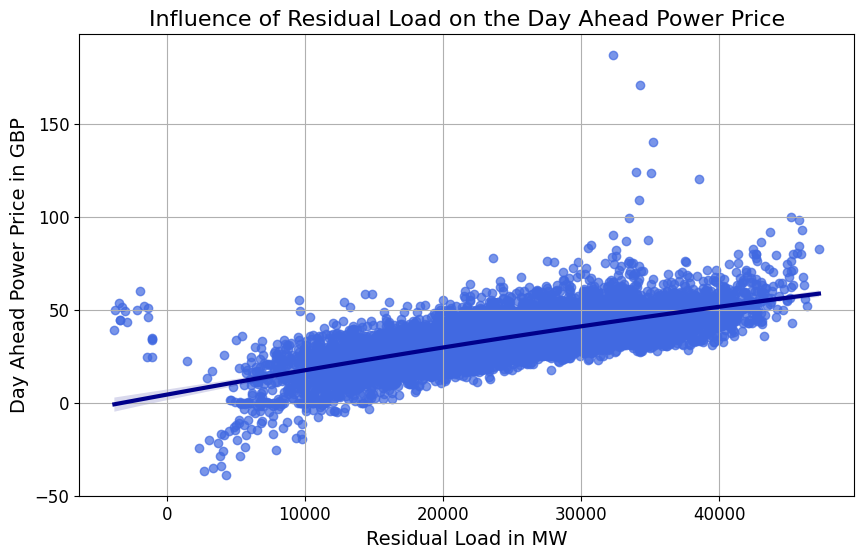

In [74]:
scatter_color = "#4169E1"
line_color = "#00008B"

plt.figure(figsize=(10, 6))

sns.regplot(x='residual_load', y='gb_da_price', data=forecast_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3},
            order=2)  # order=2 für quadratische Regression

plt.title('Influence of Residual Load on the Day Ahead Power Price', fontsize=16)
plt.xlabel('Residual Load in MW', fontsize=14)
plt.ylabel('Day Ahead Power Price in GBP', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

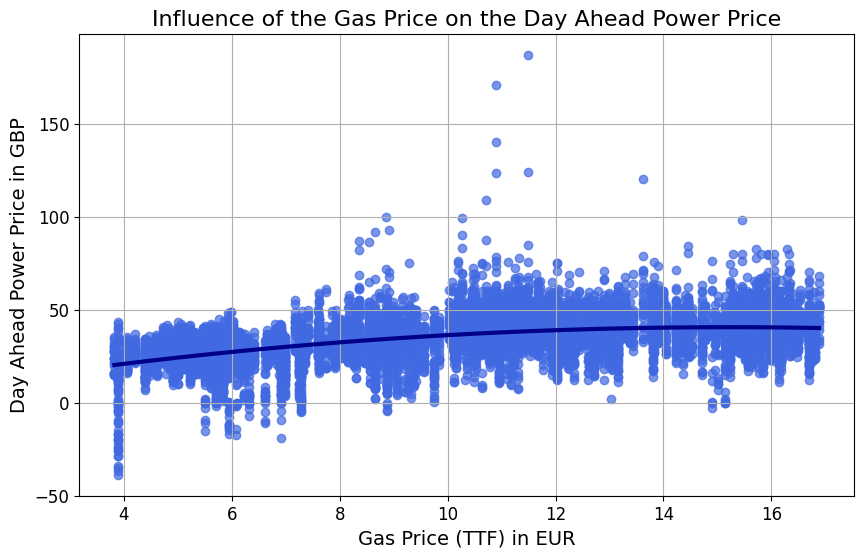

In [68]:
scatter_color = "#4169E1"
line_color = "#00008B"

plt.figure(figsize=(10, 6))

sns.regplot(x='gas_price', y='gb_da_price', data=forecast_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3},
            order=2)  # order=2 für quadratische Regression

plt.title('Influence of the Gas Price on the Day Ahead Power Price', fontsize=16)
plt.xlabel('Gas Price (TTF) in EUR', fontsize=14)
plt.ylabel('Day Ahead Power Price in GBP', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [36]:
forecast_df.corr()['gb_da_price'].sort_values(ascending=True)

gas_price       0.45
residual_load   0.70
gb_da_price     1.00
Name: gb_da_price, dtype: float64

<h1 style="color: #FF8C00;">04 | Modeling</h1>

In [37]:
X = forecast_df.drop("gb_da_price", axis=1)
y = forecast_df["gb_da_price"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(f'100% of our data: {len(forecast_df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 12261.
70% for training data: 9808.
30% for test data: 2453.


In [40]:
#regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

#models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

#print(models.head(5)) 

In [41]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
predictions = xgbr.predict(X_test)

In [43]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
2560,40.00,45.82
1234,33.93,39.62
7806,17.47,18.30
9519,34.00,31.28
4925,40.36,37.34
...,...,...
2401,24.44,34.02
9414,30.64,21.36
4072,38.73,46.89
3358,37.49,33.50


In [44]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
2560,40.00,45.82,5.82
1234,33.93,39.62,5.69
7806,17.47,18.30,0.83
9519,34.00,31.28,2.72
4925,40.36,37.34,3.02


In [45]:
r2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

In [46]:
#Printing the results
print("R2 = ", round(r2, 4))
print("MSE =  ", round(MSE, 4)) 
print("MAE = ", round(MAE, 4))

R2 =  0.7633
MSE =   34.9683
MAE =  4.3709


<h1 style="color: #FF8C00;">05 | Feature and Target Engineering Part2 </h1>

In [47]:
# Erstelle One-Hot-Encoding für Stunde und Wochentag
hour_dummies = pd.get_dummies(merged_df['hour'], prefix='hour')
weekday_dummies = pd.get_dummies(merged_df['weekday'], prefix='weekday')

# Füge die Dummies dem DataFrame hinzu
df_all = pd.concat([forecast_df, hour_dummies, weekday_dummies], axis=1)

# Jetzt wird der ursprüngliche 'hour' und 'weekday' Spalten entfernt
#df_all.drop(['hour', 'weekday'], axis=1, inplace=True)
df_all = df_all * 1
df_all

,residual_load,gas_price,gb_da_price,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,hour_22,hour_23,hour_24,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,21884.00,14.32,37.48,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,20911.00,14.32,36.91,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,19488.00,14.32,32.97,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19213.00,14.32,32.41,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20338.00,14.32,36.22,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,33629.00,13.29,59.49,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12283,30503.00,13.29,46.55,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12284,26534.00,13.29,40.95,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12285,22036.00,13.29,34.84,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


<h1 style="color: #FF8C00;">06 | Modeling Part2</h1>

In [48]:
X = df_all.drop("gb_da_price", axis=1)
y = df_all["gb_da_price"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

print(models.head(5)) 

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 9808, number of used features: 33
[LightGBM] [Info] Start training from score 34.990414
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.84       0.84  4.82        0.19
LGBMRegressor                                0.82       0.82  5.14        0.62
HistGradientBoostingRegressor                0.81       0.81  5.29        2.42
RandomForestRegressor                        0.79       0.79  5.60        1.90
BaggingRegressor                             0.76       0.77  5.87        0.20


In [51]:
xgbr2 = xgb.XGBRegressor()
xgbr2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
predictions2 = xgbr2.predict(X_test)

In [53]:
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions2})

In [54]:
eval_df2["dif"] = abs(eval_df2["actual"]-eval_df2["pred"])
eval_df2.head(20)

,actual,pred,dif
2560,40.00,45.39,5.39
1234,33.93,38.19,4.26
7806,17.47,20.45,2.98
9519,34.00,27.04,6.96
4925,40.36,41.28,0.92
10226,25.13,22.98,2.15
9315,13.89,17.55,3.66
11549,52.40,43.32,9.08
8196,24.00,21.09,2.91
8047,40.31,33.75,6.56


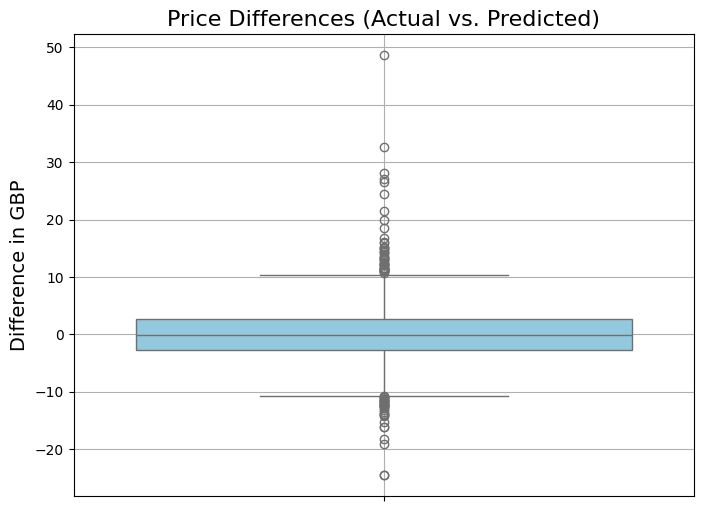

In [75]:
#not absolute 
eval_df3= pd.DataFrame({"actual":y_test,"pred":predictions2})
eval_df3["dif"] = eval_df2["actual"]-eval_df2["pred"]

plt.figure(figsize=(8, 6))
sns.boxplot(y='dif', data=eval_df3, color='Skyblue')

plt.title('Price Differences (Actual vs. Predicted)', fontsize=16)
plt.ylabel('Difference in GBP', fontsize=14)
plt.grid(True)

plt.show()

In [57]:
r2_2 = r2_score(y_test, predictions2)
MSE_2 = mean_squared_error(y_test, predictions2)
MAE_2 = mean_absolute_error(y_test, predictions2)

In [58]:
#Printing the results
print("R2 = ", round(r2_2, 4))
print("MSE =  ", round(MSE_2, 4)) 
print("MAE = ", round(MAE_2, 4))

R2 =  0.843
MSE =   23.1987
MAE =  3.5034


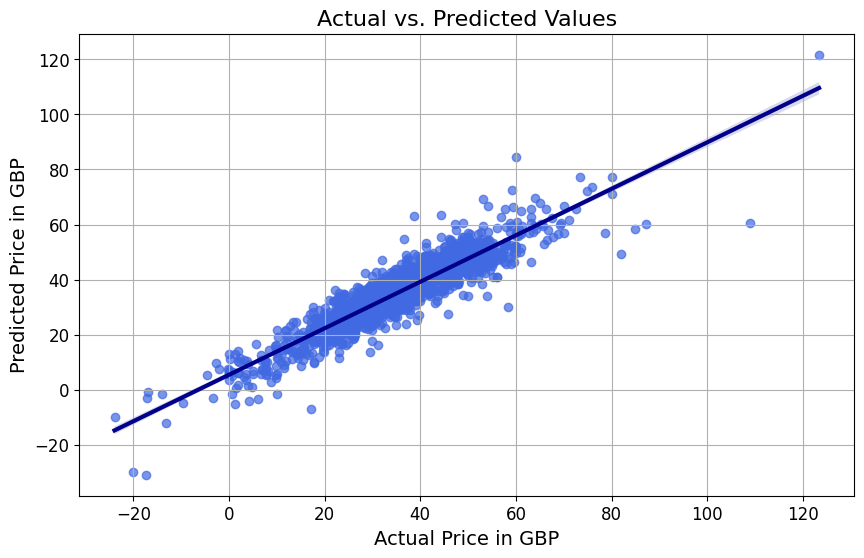

In [66]:
scatter_color = "#4169E1"
line_color = "#00008B"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df2,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Price in GBP', fontsize=14)
plt.ylabel('Predicted Price in GBP', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [61]:
import joblib

In [62]:
joblib.dump(xgbr2, 'gb_da_price_forecast_model.pkl')

['gb_da_price_forecast_model.pkl']